<a href="https://colab.research.google.com/github/saadrza/XAI/blob/main/XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explainability Ensemble for Images
Research Question:
Which is the best way to take advantage of different explainability techniques?

Main Idea:
Select an image classification task and apply different explainable AI (XAI) techniques. Then, find a way to combine the results to generate a more robust explanation compared to using each technique individually.

Possible Steps:

Choose the dataset and deep learning models to be applied (e.g., ImageNet with pre-trained ResNet, MNIST with a custom CNN).
Select three explainability techniques suitable for image tasks. We suggest using SHAP, LIME, and Grad-CAM, as they are well-documented with available tutorials.
Apply each technique individually and analyze the pros and cons of each (e.g., Technique 1 highlights both relevant and irrelevant features, Technique 2 doesn't work well for certain classes, etc.).
Combine the techniques to obtain more robust explanations. This step is the explorative and creative part. Possible approaches include averaging feature maps across techniques, using one technique for identifying main regions and another for finer details, and so on.

In [ ]:
# prompt: Explainability Ensemble for Images
# Research Question:
# Which is the best way to take advantage of different explainability techniques?
# Main Idea:
# Select an image classification task and apply different explainable AI (XAI) techniques. Then, find a way to combine the results to generate a more robust explanation compared to using each technique individually.
# Possible Steps:
# Choose the dataset and deep learning models to be applied (e.g., ImageNet with pre-trained ResNet, MNIST with a custom CNN).
# Select three explainability techniques suitable for image tasks. We suggest using SHAP, LIME, and Grad-CAM, as they are well-documented with available tutorials.
# Apply each technique individually and analyze the pros and cons of each (e.g., Technique 1 highlights both relevant and irrelevant features, Technique 2 doesn't work well for certain classes, etc.).
# Combine the techniques to obtain more robust explanations. This step is the explorative and creative part. Possible approaches include averaging feature maps across techniques, using one technique for identifying main regions and another for finer details, and so on.

!pip install lime shap

import numpy as np
import matplotlib.pyplot as plt
# ... other imports for your chosen model and dataset ...

# 1. Choose dataset and model
# Example using MNIST and a simple CNN (replace with your chosen model and dataset)
# ... load MNIST data and define the CNN model ...

# 2. Select explainability techniques
# SHAP, LIME, Grad-CAM

# 3. Apply each technique individually
# ... Example using SHAP (adapt for LIME and Grad-CAM)
# ...  Assume 'explainer' and 'image' are appropriately defined ...

# Example (replace with your actual implementations):

def explain_with_shap(model, image):
  # Placeholder - Replace with your actual SHAP implementation
  # ...
  shap_values = np.random.rand(28,28)  # Replace with actual SHAP values
  return shap_values

def explain_with_lime(model, image):
  # Placeholder - Replace with your actual LIME implementation
  lime_values = np.random.rand(28, 28) #Replace with actual LIME values
  return lime_values

def explain_with_gradcam(model, image):
    # Placeholder - Replace with your actual Grad-CAM implementation
    gradcam_values = np.random.rand(28, 28) # Replace with actual GradCAM values
    return gradcam_values

# Example usage (replace with your data loading):
image = np.random.rand(28, 28) # Replace with your image data
model = None # Replace with your trained model

shap_explanation = explain_with_shap(model, image)
lime_explanation = explain_with_lime(model, image)
gradcam_explanation = explain_with_gradcam(model, image)


# 4. Combine techniques
# Example: Averaging the explanations
ensemble_explanation = (shap_explanation + lime_explanation + gradcam_explanation) / 3

# Example: Visualization (replace with your visualization)
plt.imshow(ensemble_explanation, cmap='viridis')
plt.title("Ensemble Explanation")
plt.show()


# Further analysis and experimentation with different combination methods.

# Example using a weighted average, where weights are determined by performance metrics (e.g. accuracy) of individual XAI methods
# Weights are between 0 and 1, adding to 1
weight_shap = 0.4
weight_lime = 0.3
weight_gradcam = 0.3
weighted_ensemble = (weight_shap * shap_explanation) + (weight_lime * lime_explanation) + (weight_gradcam * gradcam_explanation)
plt.imshow(weighted_ensemble, cmap="magma")
plt.title("Weighted Ensemble Explanation")
plt.colorbar() # Show the colorbar
plt.show()

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=6c8edf583b45ec1531f389851e37157d73d3d2e2c514068944a07ee160e2c32b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 3.5.0


In [ ]:
inet_model = inc_net.InceptionV3()

In [ ]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

## Let's see the top 5 prediction for some image

> Add blockquote



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
('n02133161', 'American_black_bear', 0.6372792)
('n02105056', 'groenendael', 0.031802803)
('n02104365', 'schipperke', 0.02992132)
('n01883070', 'wombat', 0.028507452)
('n01877812', 'wallaby', 0.025098657)


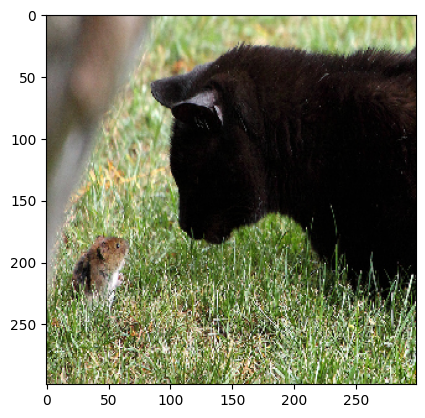

In [ ]:
images = transform_img_fn([os.path.join('cat_mouse.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [ ]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

In [ ]:
from skimage.segmentation import mark_boundaries

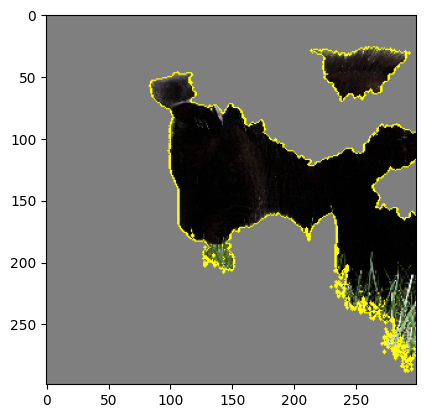

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

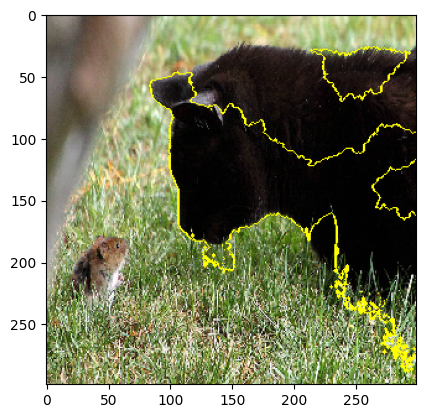

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


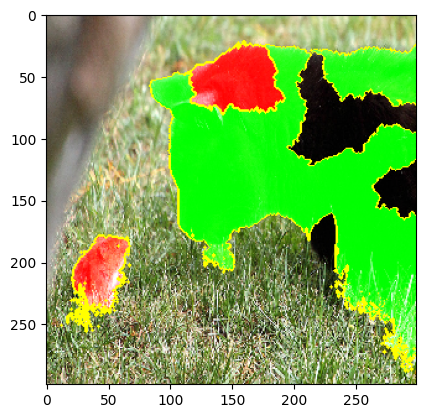

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

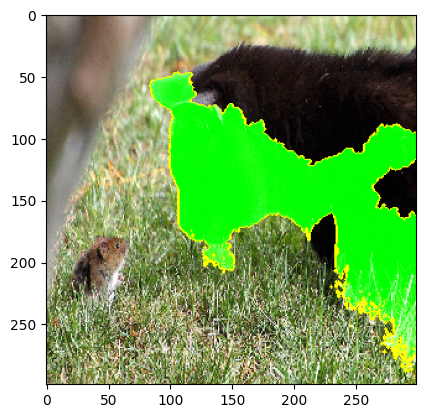

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

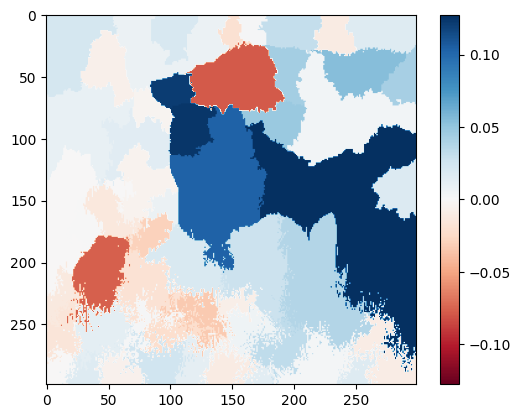

In [ ]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

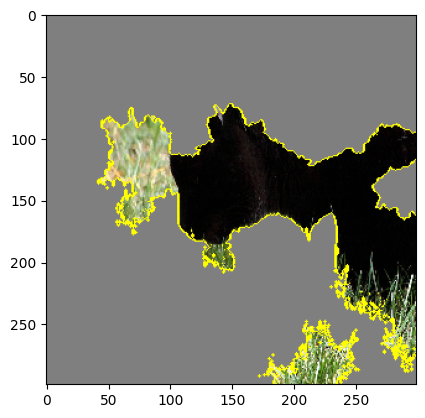

In [ ]:
temp, mask = explanation.get_image_and_mask(106, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

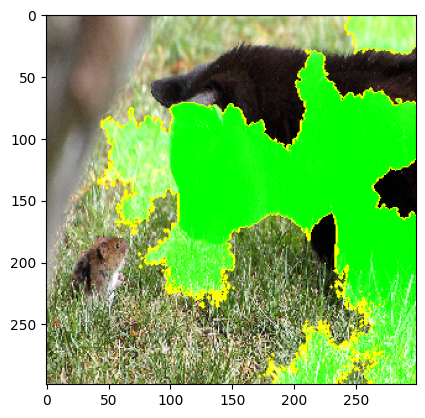

In [ ]:
temp, mask = explanation.get_image_and_mask(106, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
